In [1]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [3]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [4]:
specification = specs.CoiledCoil.from_parameters

In [5]:
sequences = ['GGGGGGGGGGGGGGGGGGGGGGGGGGGGGG', 'GGGGGGGGGGGGGGGGGGGGGGGGGGGGGG']

In [6]:
parameters = [
    Parameter.static('Oligomeric State', 2),
    Parameter.static('Helix Length', 30),
    Parameter.dynamic('Radius', 5.0, 1.0),
    Parameter.dynamic('Pitch', 200, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['a'], 27),  
]

In [7]:
default_values = [x.default_value for x in parameters]
print(default_values)

[2, 30, 5.0, 200, 0]


In [8]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [9]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

In [10]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	69   	-525.093	4.57581	-532.111	-515.144
1  	69   	-529.437	2.04407	-532.111	-525.277
2  	66   	-531.384	0.589765	-532.181	-529.683
3  	94   	-531.941	0.197771	-532.735	-531.633
4  	64   	-532.136	0.179208	-532.735	-531.887
5  	72   	-532.305	0.183463	-532.74 	-532.054
6  	68   	-532.452	0.152074	-532.832	-532.198
7  	60   	-532.592	0.102013	-532.832	-532.414
8  	80   	-532.703	0.0572895	-532.85 	-532.598
9  	69   	-532.761	0.0487649	-532.85 	-532.683
10 	55   	-532.795	0.035124 	-532.857	-532.728
11 	82   	-532.823	0.0194938	-532.874	-532.788
12 	72   	-532.833	0.0164837	-532.893	-532.807
13 	87   	-532.844	0.0139142	-532.9  	-532.826
14 	71   	-532.854	0.0168714	-532.918	-532.833
15 	64   	-532.858	0.0161734	-532.918	-532.837
16 	81   	-532.865	0.0158491	-532.918	-532.844
17 	78   	-532.874	0.0139089	-532.918	-532.857
18 	54   	-532.881	0.0136866	-532.918	-532.861
19 	88   	-532.885	0.0136034	-532.918	-532.866
20 	82   	-532.889	0.0119

In [11]:
optimized_model_ga = opt_ga.best_model

In [12]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-532.9429505208537

In [13]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [14]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

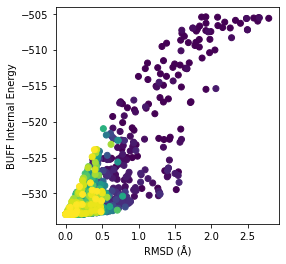

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('ga.png')

In [16]:
f = open('polyG-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [17]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [18]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max    
0  	100  	-518.524	7.85426	-531.753	-505.64
1  	100  	-523.157	5.67403	-531.818	-507.413
2  	100  	-526.467	3.86832	-531.984	-511.787
3  	100  	-528.362	2.61982	-532.155	-515.616
4  	100  	-529.56 	1.84046	-532.257	-524.304
5  	100  	-530.568	1.31136	-532.551	-527.17 
6  	100  	-531.202	0.851834	-532.551	-528.243
7  	100  	-531.599	0.563244	-532.551	-529.961
8  	100  	-531.897	0.321928	-532.551	-530.822
9  	100  	-532.05 	0.252204	-532.68 	-531.433
10 	100  	-532.171	0.221494	-532.68 	-531.726
11 	100  	-532.281	0.205895	-532.739	-531.726
12 	100  	-532.381	0.171699	-532.749	-532.024
13 	100  	-532.462	0.148241	-532.75 	-532.068
14 	100  	-532.518	0.131124	-532.815	-532.197
15 	100  	-532.592	0.119152	-532.815	-532.306
16 	100  	-532.659	0.094509	-532.872	-532.443
17 	100  	-532.711	0.0734271	-532.872	-532.507
18 	100  	-532.745	0.0585897	-532.894	-532.608
19 	100  	-532.783	0.0446833	-532.906	-532.681
20 	100  	-532.807	0.0411618	-532.906	-5

In [19]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-532.9369655526856

In [20]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [21]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

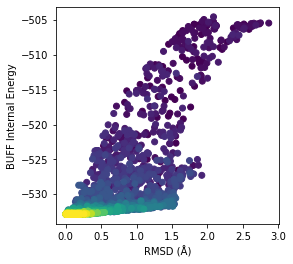

In [22]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('de.png')

In [23]:
f = open('polyG-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [24]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [25]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-520.335	7.91906	-537.845	-506.274
1  	81   	-528.029	6.18549	-538.846	-509.432
2  	43   	-529.817	6.39018	-540.56 	-509.432
3  	67   	-519.261	10.3275	-540.56 	-507.574
4  	83   	-512.652	6.4795 	-537.541	-505.652
5  	81   	-520.52 	8.49757	-537.868	-501.34 
6  	67   	-527.25 	7.61764	-539.766	-501.34 
7  	52   	-526.817	8.04317	-540.09 	-501.34 
8  	62   	-523.69 	7.82451	-540.09 	-506.443
9  	90   	-522.828	7.28801	-538.487	-505.968
10 	87   	-527.371	7.2877 	-538.487	-506.647
11 	49   	-527.696	7.63176	-538.546	-502.399
12 	59   	-521.897	8.21714	-538.546	-502.399
13 	85   	-521.246	7.12978	-537.231	-507.109
14 	86   	-526.647	7.12547	-537.858	-504.548
15 	54   	-526.874	7.31946	-538.115	-504.548
16 	76   	-517.927	8.41167	-538.115	-507.151
17 	97   	-514.263	5.78523	-533.713	-506.715
18 	97   	-522.088	7.31594	-538.034	-508.002
19 	79   	-527.999	6.468  	-540.287	-500.676
20 	45   	-526.757	7.28501	-540.287	-500.676
21 	76   	

In [26]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-540.5603201475714

In [27]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [28]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

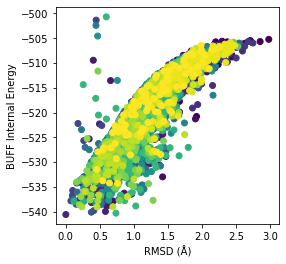

In [29]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('pso.png')

In [30]:
f = open('polyG-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [31]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [32]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-513.288	4.32794	-528.767	-506.414
1  	100  	-519.301	9.54706	-532.493	-505.122
2  	100  	-525.682	6.80158	-532.659	-505.544
3  	100  	-531.234	1.13277	-532.825	-526.466
4  	100  	-531.813	0.73763	-532.775	-528.747
5  	100  	-532.468	0.198478	-532.881	-531.994
6  	100  	-532.383	0.38398 	-532.87 	-531.088
7  	100  	-532.587	0.275442	-532.915	-531.293
8  	100  	-532.752	0.0798992	-532.9  	-532.45 
9  	100  	-532.803	0.0633575	-532.908	-532.602
10 	100  	-532.829	0.0413208	-532.928	-532.681
11 	100  	-532.851	0.034501 	-532.93 	-532.749
12 	100  	-532.865	0.026038 	-532.928	-532.806
13 	100  	-532.866	0.02384  	-532.912	-532.796
14 	100  	-532.873	0.0216997	-532.935	-532.818
15 	100  	-532.874	0.0209004	-532.921	-532.814
16 	100  	-532.882	0.0199341	-532.923	-532.832
17 	100  	-532.878	0.0188457	-532.931	-532.825
18 	100  	-532.878	0.019008 	-532.925	-532.831
19 	100  	-532.879	0.0228269	-532.929	-532.82 
20 	100  	-532.881	0.0163859

In [33]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-532.9495651702907

In [34]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [35]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

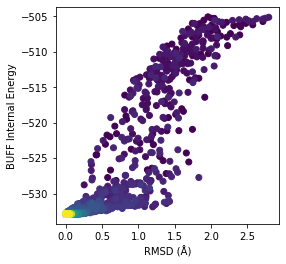

In [36]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('cmaes.png')

In [37]:
f = open('polyG-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)